4. In a new notebook, load the dataframe object.  Using k-fold cross-validation, apply a linear regression model.  Here, the response variable is the number of times a song has been played based on what we know about the listeners.  Be sure to return the model score on both the training and validation data.
5. Explain your results.  Specifically address, if the assumption of linear response to the input features was reasonable.  You will want to study a plot of the model's residual.  Ideally, the residuals are small in magnitude, and are evenly distributed about the true values.  What are some possible improvements that can be made?
6. Suppose we are instead curious about whether a song will be played by a user based on a demographics.  Apply a logistic regression model and report your results.

First, we can import all the package that we are going to use in this section.

In [77]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

We can read the pickle file.

In [10]:
pickle_in = open("data.pkl", "rb")
dataprocessed = pickle.load(pickle_in)
print (type(dataprocessed))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
Check the data types.

In [11]:
#dataprocessed = dataprocessed.infer_objects() #convert datatypes
print dataprocessed.dtypes

Track Name           object
Number of Played      int64
By Gender           float64
Male Percentage     float64
AVG Age             float64
Played Once         float64
Once Percentage     float64
Played Five         float64
Fifth Percentage    float64
dtype: object


In [ ]:
Print the first 5 rows.

In [5]:
dataprocessed.head()

,Track Name,Number of Played,By Gender,Male Percentage,AVG Age,Played Once,Once Percentage,Played Five,Fifth Percentage
0,\nuser_000125\t2007-11-23T04:25:49Z\t03ad1736-...,1,0.0,0.00,20.00,1.0,100.00,0.0,0.00
1,~Kuuhaku~,50,0.0,0.00,20.00,0.0,0.00,1.0,2.00
2,!,2,2.0,100.00,30.00,0.0,0.00,0.0,0.00
3,! (Foreword),38,13.0,34.21,24.53,1.0,2.63,3.0,7.89
4,! (Forward),6,6.0,100.00,25.00,0.0,0.00,1.0,16.67


In [79]:
df = dataprocessed
df

,Track Name,Number of Played,By Gender,Male Percentage,AVG Age,Played Once,Once Percentage,Played Five,Fifth Percentage
0,\nuser_000125\t2007-11-23T04:25:49Z\t03ad1736-...,1,0.0,0.00,20.00,1.0,100.00,0.0,0.00
1,~Kuuhaku~,50,0.0,0.00,20.00,0.0,0.00,1.0,2.00
2,!,2,2.0,100.00,30.00,0.0,0.00,0.0,0.00
3,! (Foreword),38,13.0,34.21,24.53,1.0,2.63,3.0,7.89
4,! (Forward),6,6.0,100.00,25.00,0.0,0.00,1.0,16.67
5,! (Performed By Ghostface Killah And Rhythm Ro...,8,8.0,100.00,23.25,0.0,0.00,1.0,12.50
6,! (The Song Formerly Known As),1,1.0,100.00,28.00,1.0,100.00,0.0,0.00
7,! +,1,1.0,100.00,28.00,1.0,100.00,0.0,0.00
8,! / Sn10.1.Ai 0711,1,1.0,100.00,29.00,1.0,100.00,0.0,0.00
9,! / Sn2.Ai 0853,1,1.0,100.00,29.00,1.0,100.00,0.0,0.00


## The song played by male listener responsed by variable number of played

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Select the variables that we are going to train and test. In here we are going to get the model for male listener based on the total number the song has been played for as response variable.

In [80]:
from sklearn import datasets

xmale = df[['By Gender']]
ymale = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxmale, testxmale, trainymale, testymale) = train_test_split(xmale, ymale, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainymale)))
print("testing data points: {}".format(len(testymale)))

training data points: 341016
testing data points: 113672


Then, we can apply the linear regression to get a model and do the prediction.

In [35]:
from sklearn.linear_model import LinearRegression
# train regression model
regr = LinearRegression(fit_intercept=True)
regr.fit(trainxmale, trainymale)
y_pred = regr.predict(testxmale)

We can count the accuracy and set it for 10 models. We can also able to get the mean and the standard deviation.

In [36]:
#apply K-Fold to our training set
accuracies = cross_val_score(estimator = regr, X = trainxmale, y = trainymale, cv = 10)
print "Mean of the accuracy", accuracies.mean()
print "Std Deviation of the accuracy", accuracies.std()
accuracies

Mean of the accuracy 0.8626161922524924
Std Deviation of the accuracy 0.011607792369454783


array([0.88151507, 0.85969412, 0.84279512, 0.87579766, 0.85047046,
       0.86079553, 0.86474064, 0.86608374, 0.87325329, 0.85101629])

We can see the mean value in the above data to know the accuracy of the overall performance, in this case it is 86 percent. The standard deviation to know the variance of the data whether it is low or high. In this case we have a variance of 1.1 percent.

In [ ]:
Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

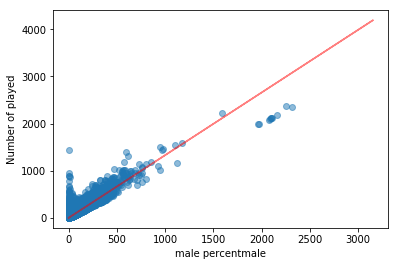

In [37]:
# plot training data, overlay with fit
plt.plot(trainxmale,trainymale,'o', alpha = 0.5)
plt.plot(testxmale, y_pred, 'r', alpha = 0.5)
plt.xlabel('male percentmale')
plt.ylabel('Number of played')


## The average listener age responsed by variable number of played

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for mean age of the listener based on the total number the song has been played for as response variable.

In [42]:
xage = df[['AVG Age']]
yage = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxage, testxage, trainyage, testyage) = train_test_split(xage, yage, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyage)))
print("testing data points: {}".format(len(testyage)))

training data points: 341016
testing data points: 113672


We can count the accuracy and set it for 10 models. We can also able to get the mean and the standard deviation. We can see the mean value in the above data to know the accuracy of the overall performance. The standard deviation to know the variance of the data whether it is low or high. 

In [44]:
# train regression model
regrage = LinearRegression(fit_intercept=True)
regrage.fit(trainxage, trainyage)
y_predage = regrage.predict(testxage)

In [45]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesage = cross_val_score(estimator = regrage, X = trainxage, y = trainyage, cv = 10)
print "Mean of the accuracy", accuraciesage.mean()
print "Std Deviation of the accuracy", accuraciesage.std()
accuraciesage

Mean of the accuracy 0.004682158515658896
Std Deviation of the accuracy 0.00039982887321463197


array([0.00463731, 0.00402015, 0.0051109 , 0.00539617, 0.00489501,
       0.00421902, 0.0046844 , 0.00493267, 0.00431118, 0.00461479])

We can see the mean value in the above data to know the accuracy of the overall performance, in this case it is 4.6 percent. The standard deviation to know the variance of the data whether it is low or high. In this case we have a variance very small.

Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

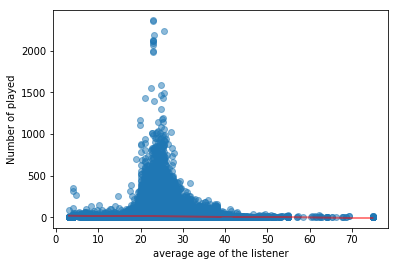

In [47]:
# plot training data, overlay with fit
plt.plot(trainxage,trainyage,'o', alpha = 0.5)
plt.plot(testxage, y_predage, 'r', alpha = 0.5)
plt.xlabel('average age of the listener')
plt.ylabel('Number of played')


## Listener who played a certain song once responsed by variable number of played by number

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing. 

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for the listener who played it once based on the total number the song has been played for as response variable.

In [70]:
xone = df[['Played Once']]
yone = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxone, testxone, trainyone, testyone) = train_test_split(xone, yone, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyone)))
print("testing data points: {}".format(len(testyone)))

training data points: 341016
testing data points: 113672


We can count the accuracy and set it for 10 models. We can also able to get the mean and the standard deviation. We can see the mean value in the above data to know the accuracy of the overall performance. The standard deviation to know the variance of the data whether it is low or high. 

In [71]:
# train regression model
regrone = LinearRegression(fit_intercept=True)
regrone.fit(trainxone, trainyone)
y_predone = regrone.predict(testxone)

In [72]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesone = cross_val_score(estimator = regrone, X = trainxone, y = trainyone, cv = 10)
print "Mean of the accuracy", accuraciesone.mean()
print "Std Deviation of the accuracy", accuraciesone.std()
accuraciesone

Mean of the accuracy 0.43250179393500154
Std Deviation of the accuracy 0.026702688363886555


array([0.43226816, 0.4412968 , 0.42876746, 0.46858775, 0.42928986,
       0.37095191, 0.42250402, 0.47399969, 0.43526328, 0.42208901])

In [ ]:
Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

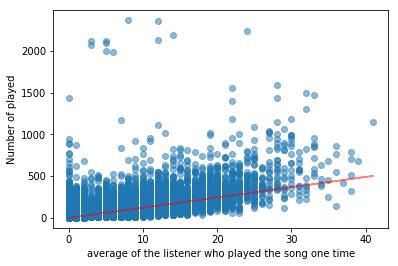

In [74]:
# plot training data, overlay with fit
plt.plot(trainxone,trainyone,'o', alpha = 0.5)
plt.plot(testxone, y_predone, 'r', alpha = 0.5)
plt.xlabel('average of the listener who played the song one time')
plt.ylabel('Number of played')


## Listener who played a certain song once responsed by variable number of played by percentage

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for the percentage listener who played it once based on the total number the song has been played for as response variable.

In [53]:
xonce = df[['Once Percentage']]
yonce = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxonce, testxonce, trainyonce, testyonce) = train_test_split(xonce, yonce, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyonce)))
print("testing data points: {}".format(len(testyonce)))

training data points: 341016
testing data points: 113672


We can count the accuracy and set it for 10 models. We can also able to get the mean and the standard deviation. We can see the mean value in the above data to know the accuracy of the overall performance. The standard deviation to know the variance of the data whether it is low or high. 

In [54]:
# train regression model
regronce = LinearRegression(fit_intercept=True)
regronce.fit(trainxonce, trainyonce)
y_predonce = regronce.predict(testxonce)

In [55]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesonce = cross_val_score(estimator = regronce, X = trainxonce, y = trainyonce, cv = 10)
print "Mean of the accuracy", accuraciesonce.mean()
print "Std Deviation of the accuracy", accuraciesonce.std()
accuraciesonce

Mean of the accuracy 0.04903883813977915
Std Deviation of the accuracy 0.0049729713867157025


array([0.04567496, 0.04047921, 0.05247674, 0.05992295, 0.05075593,
       0.04523814, 0.04723507, 0.05207251, 0.04910156, 0.04743131])

In [ ]:
Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

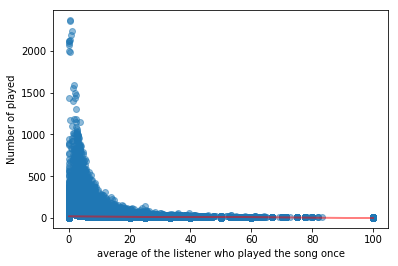

In [56]:
# plot training data, overlay with fit
plt.plot(trainxonce,trainyonce,'o', alpha = 0.5)
plt.plot(testxonce, y_predonce, 'r', alpha = 0.5)
plt.xlabel('average of the listener who played the song once')
plt.ylabel('Number of played')


## Listener who played a certain song at least 5 times responsed by variable number of played by number

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for the listener who played it at least 5 times based on the total number the song has been played for as response variable.

In [62]:
xfive = df[['Played Five']]
yfive = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxfive, testxfive, trainyfive, testyfive) = train_test_split(xfive, yfive, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyfive)))
print("testing data points: {}".format(len(testyfive)))

training data points: 341016
testing data points: 113672


We can count the accuracy and set it for 10 models. We can also able to get the mean and the standard deviation. We can see the mean value in the above data to know the accuracy of the overall performance. The standard deviation to know the variance of the data whether it is low or high. 

In [63]:
# train regression model
regrfive = LinearRegression(fit_intercept=True)
regrfive.fit(trainxfive, trainyfive)
y_predfive = regrfive.predict(testxfive)

In [64]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesfive = cross_val_score(estimator = regrfive, X = trainxfive, y = trainyfive, cv = 10)
print "Mean of the accuracy", accuraciesfive.mean()
print "Std Deviation of the accuracy", accuraciesfive.std()
accuraciesfive

Mean of the accuracy 0.7620352040590175
Std Deviation of the accuracy 0.047334205662490664


array([0.7769722 , 0.76742585, 0.74584634, 0.82307082, 0.7445333 ,
       0.65468232, 0.75347225, 0.83911889, 0.76945603, 0.74577402])

In [ ]:
Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

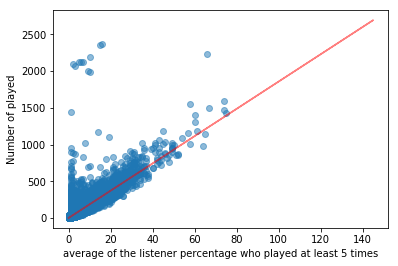

In [65]:
# plot training data, overlay with fit
plt.plot(trainxfive,trainyfive,'o', alpha = 0.5)
plt.plot(testxfive, y_predfive, 'r', alpha = 0.5)
plt.xlabel('average of the listener percentage who played at least 5 times')
plt.ylabel('Number of played')


## Listener who played a certain song at least 5 times responsed by variable number of played by percentage

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for the percentage listener who played it at least 5 times based on the total number the song has been played for as response variable.

In [66]:
xfifth = df[['Fifth Percentage']]
yfifth = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxfifth, testxfifth, trainyfifth, testyfifth) = train_test_split(xfifth, yfifth, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyfifth)))
print("testing data points: {}".format(len(testyfifth)))

training data points: 341016
testing data points: 113672


We can count the accuracy and set it for 10 models. We can also able to get the mean and the standard deviation. We can see the mean value in the above data to know the accuracy of the overall performance. The standard deviation to know the variance of the data whether it is low or high. 

In [67]:
# train regression model
regrfifth = LinearRegression(fit_intercept=True)
regrfifth.fit(trainxfifth, trainyfifth)
y_predfifth = regrfifth.predict(testxfifth)

In [68]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesfifth = cross_val_score(estimator = regrfifth, X = trainxfifth, y = trainyfifth, cv = 10)
print "Mean of the accuracy", accuraciesfifth.mean()
print "Std Deviation of the accuracy", accuraciesfifth.std()
accuraciesfifth

Mean of the accuracy 0.018232819895359208
Std Deviation of the accuracy 0.002325203555722994


array([0.01600951, 0.01553838, 0.01939069, 0.02370651, 0.01896559,
       0.01568692, 0.01742793, 0.01979416, 0.01825114, 0.01755738])

In [ ]:
Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

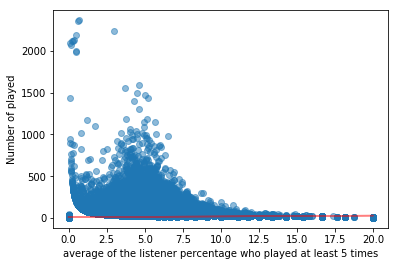

In [69]:
# plot training data, overlay with fit
plt.plot(trainxfifth,trainyfifth,'o', alpha = 0.5)
plt.plot(testxfifth, y_predfifth, 'r', alpha = 0.5)
plt.xlabel('average of the listener percentage who played at least 5 times')
plt.ylabel('Number of played')
